# Flights price prediction

## 1. Подготовка датасета

In [56]:
!pip install pandas

In [57]:
import pandas as pd

In [59]:
data = pd.read_csv('Flights.csv', index_col=0) 
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [60]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Кодировка объектов

In [62]:
data.info() #смотрим, какие поля являются количественными и качественными

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [63]:
categorical_columns = [col for col in data 
                       if data[col].dtypes == 'object']
for column in categorical_columns: 
    print('-'*5, column, '-'*5)
    print(data[column].value_counts())
    print('\n')

----- airline -----
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


----- flight -----
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64


----- source_city -----
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


----- departure_time -----
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


----- stops -----
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64


----- arrival_time -----
Night            91538
Evening          78323
Morning          62735
Afternoon   

In [7]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [8]:
pd.factorize(data['class'])[0]

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
data['class']=pd.factorize(data['class'])[0] # метод для кодирования признака class (Ordinal Encoding)

In [10]:
data['stops']=pd.factorize(data['stops'])[0] # метод для кодирования признака stops (Ordinal Encoding)

In [12]:
data['flight'].nunique()

1561

In [13]:
data['departure_time'].nunique()

6

In [14]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [15]:
data['departure_time']=pd.factorize(data['departure_time'])[0] # метод для кодирования признака departure_time (Ordinal Encoding)

In [16]:
pd.factorize(data['arrival_time'])

(array([0, 1, 2, ..., 0, 4, 4], dtype=int64),
 Index(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
        'Late_Night'],
       dtype='object'))

In [17]:
data['arrival_time']=pd.factorize(data['arrival_time'])[0] # метод для кодирования признака arrival_time (Ordinal Encoding)

In [18]:
data.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [19]:
data.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [20]:
data.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [21]:
data['airline']=pd.factorize(data['airline'])[0] # метод для кодирования признака airline (Ordinal Encoding)

In [22]:
data.stops.unique()

array([0, 1, 2], dtype=int64)

In [23]:
data.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [24]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SG-8709,Delhi,0,0,0,Mumbai,0,2.17,1,5953
1,0,SG-8157,Delhi,1,0,1,Mumbai,0,2.33,1,5953
2,1,I5-764,Delhi,1,0,2,Mumbai,0,2.17,1,5956
3,2,UK-995,Delhi,2,0,3,Mumbai,0,2.25,1,5955
4,2,UK-963,Delhi,2,0,1,Mumbai,0,2.33,1,5955


## 2. Разведывательный анализ данных

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
data.info() #оценка переменных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 27.5+ MB


### 2.1. Поиск пропусков

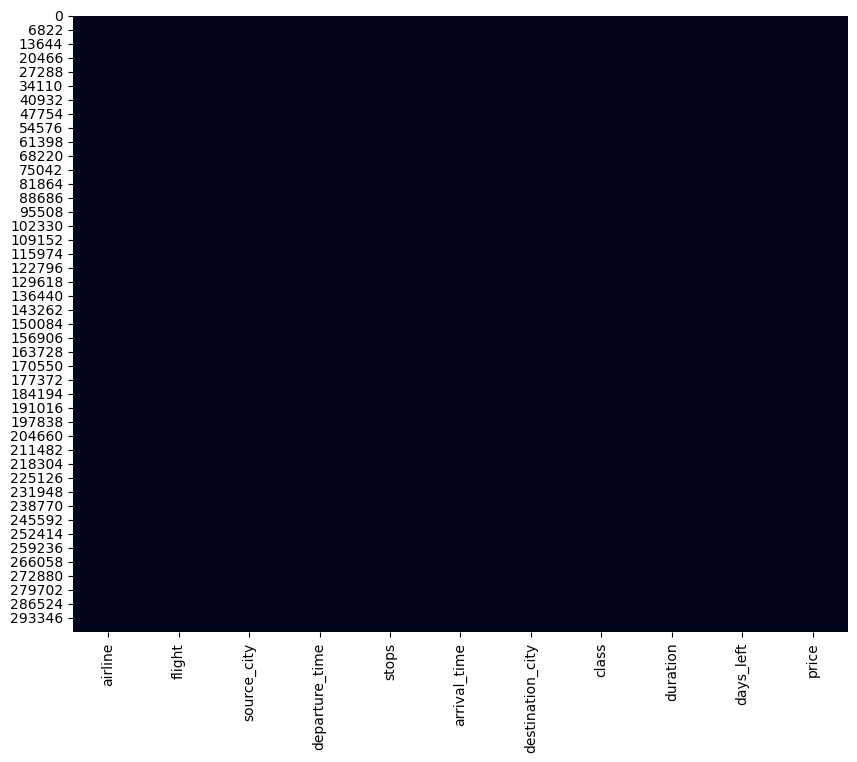


Количество пропусков в каждом столбце: 
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

print('\nКоличество пропусков в каждом столбце: ')
print(data.isnull().sum())

In [30]:
categorical_columns = [col for col in data 
                       if data[col].dtypes == 'object']
for column in categorical_columns: 
    print('-'*5, column, '-'*5)
    print(data[column].value_counts())
    print('\n')

----- flight -----
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64


----- source_city -----
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


----- destination_city -----
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64




## 2.2. Одномерный анализ

In [35]:
categorical_columns[1:][i]

['source_city', 'destination_city']

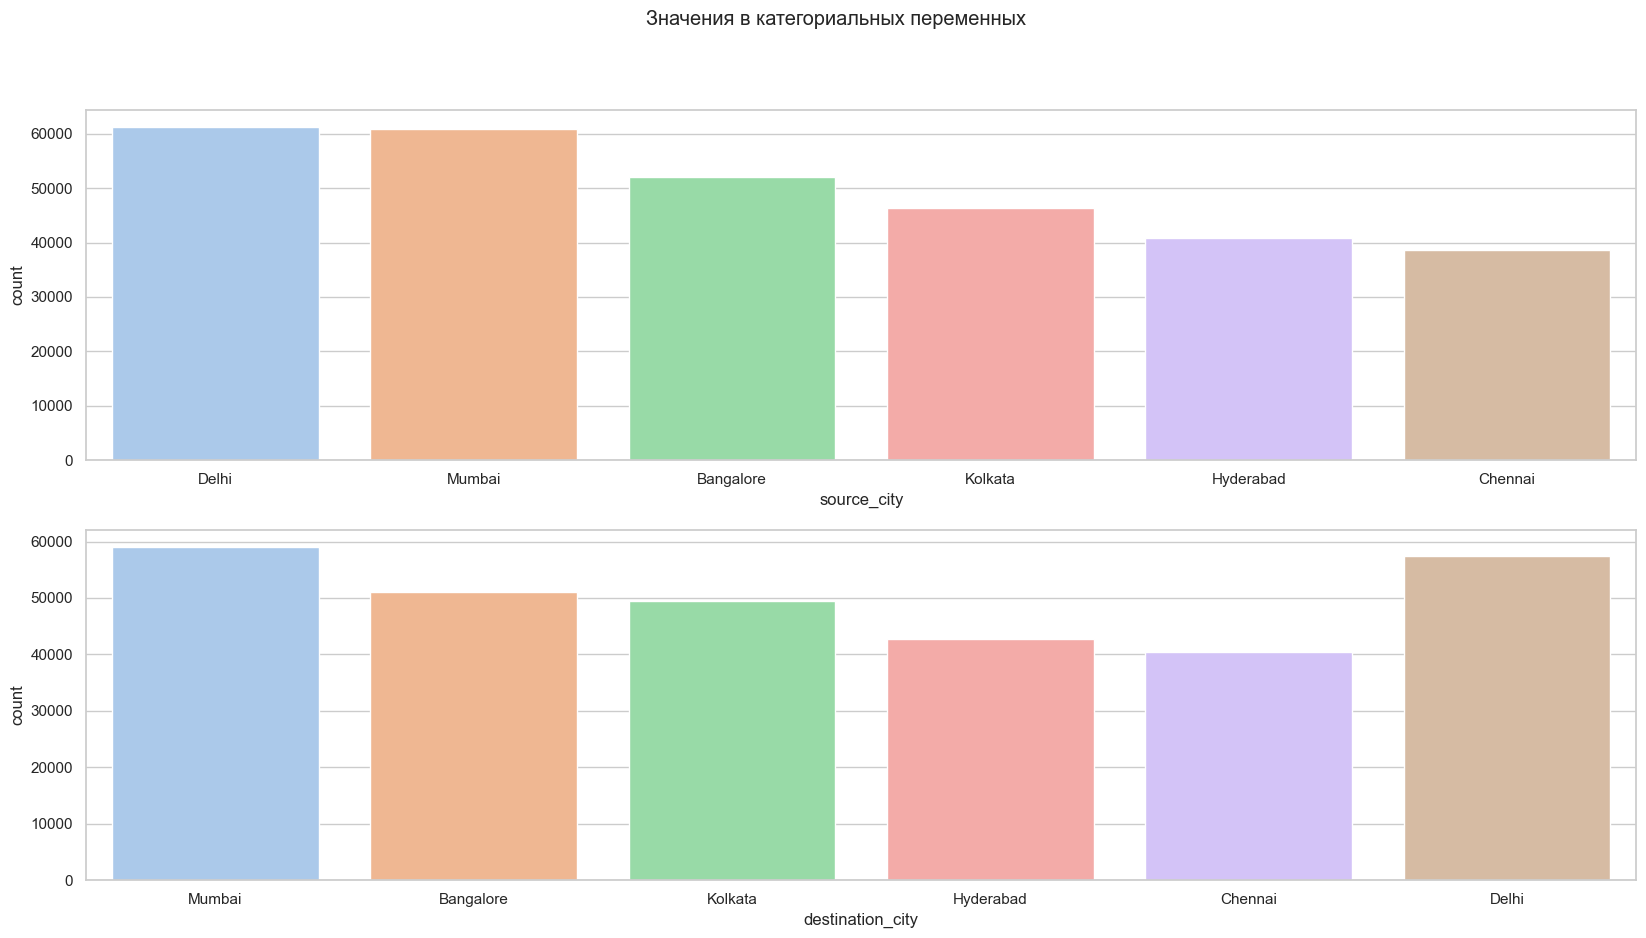

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax = ax.flatten()
fig.suptitle('Значения в категориальных переменных')

sns.set_theme(style='whitegrid', palette='pastel')
for i in range(len(categorical_columns[1:])):
    sns.countplot(ax=ax[i], x=categorical_columns[1:][i], data=data)

## 2.3. Двумерный анализ

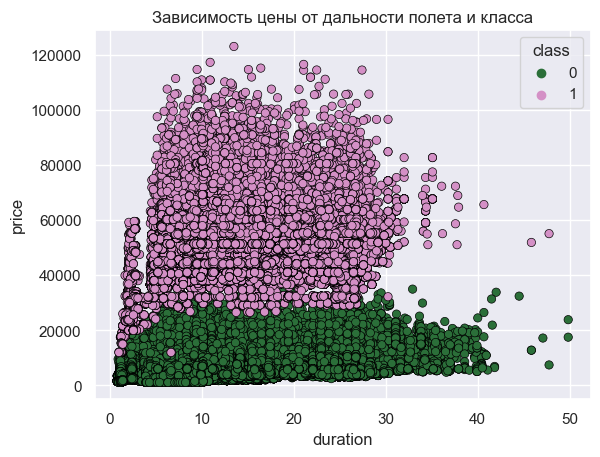

In [46]:
sns.set_style('darkgrid')
sns.scatterplot(x='duration', y='price', data=data, hue='class', edgecolor='black', palette='cubehelix')
plt.title('Зависимость цены от дальности полета и класса')
plt.show() 

Вывод: цена билета сильнее зависит от выбора класса, чем от дальности полета. 
Самая высокая цена на билет составляет более 120 000, при этом дальность полета ниже средней дальности по датасету.
В датасете присутствует выброс: цена билета на первый класс существенно ниже, чем среднее значение бидета в первом классе.

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x='duration', y='price', data=data, hue='stops', edgecolor='black', palette='cubehelix')
plt.title('Зависимость цены от дальности полета и количества пересадок')
plt.show() 

## 2.4. Диаграмма корреляции

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

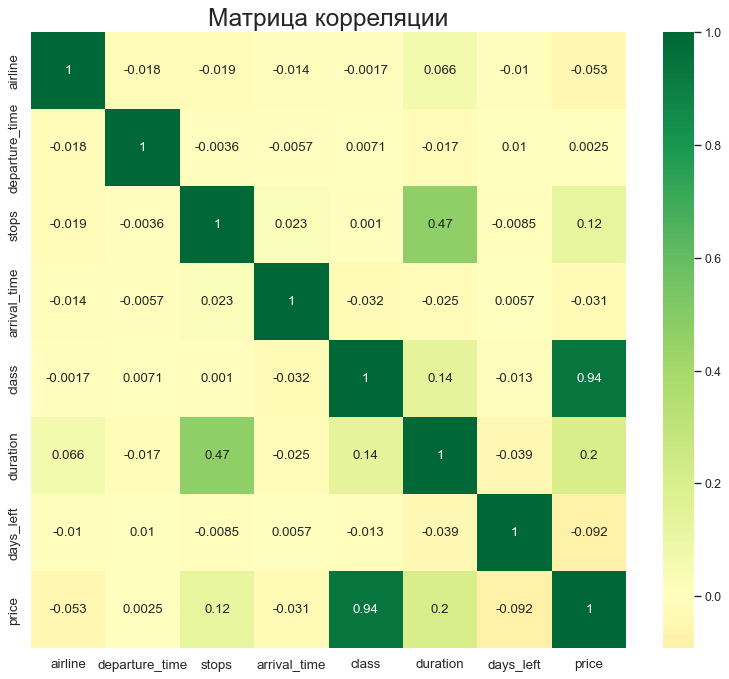

In [54]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

ВЫвод: на цену влияют сильнее всего класс.

# Построение модели предсказания цены

In [42]:
!pip install scikit-learn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [44]:
y = data.price
X = data.drop(['price'], axis=1)

low_cardinality_cols = [col for col in X
                        if len(X[col].unique()) <= 10 and X[col].dtype == 'object']
numerical_columns = [col for col in X
                     if X[col].dtype in ['int64', 'float64']]

X = X[low_cardinality_cols + numerical_columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=0)

In [45]:
low_cardinality_cols

['source_city', 'destination_city']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 27.5+ MB


In [47]:
def get_mae(X_train, X_val, y_train, y_val): # Функция для определения средней абсолютной ошибки
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    return mean_absolute_error(predict, y_val)

In [55]:
y_val.mean()

20718.07551098599

In [48]:
X_train

,source_city,destination_city,airline,departure_time,stops,arrival_time,class,duration,days_left
8891,Delhi,Mumbai,2,3,1,1,0,19.25,44
273375,Kolkata,Chennai,2,1,1,0,1,15.58,19
229182,Mumbai,Delhi,2,0,0,0,1,2.17,42
38568,Delhi,Chennai,3,5,1,2,0,5.67,23
218311,Delhi,Kolkata,5,2,1,1,1,23.75,38
...,...,...,...,...,...,...,...,...,...
211543,Delhi,Mumbai,5,2,0,1,1,2.25,46
86293,Bangalore,Delhi,2,2,1,0,0,13.42,13
122579,Kolkata,Delhi,3,0,1,5,0,9.58,20
152315,Kolkata,Chennai,5,3,1,2,0,18.25,47


In [49]:
XX_train=pd.get_dummies(X_train) # метод для кодирования категориальных признаков

In [50]:
XX_val=pd.get_dummies(X_val) # метод для кодирования категориальных признаков

In [51]:
XX_val

,airline,departure_time,stops,arrival_time,class,duration,days_left,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
44712,2,3,1,4,0,27.50,11,0,0,0,0,0,1,0,0,1,0,0,0
233644,2,2,1,4,1,6.92,43,0,0,0,0,0,1,1,0,0,0,0,0
121467,5,1,0,1,0,2.25,14,0,0,0,0,1,0,0,0,1,0,0,0
185846,5,4,0,0,0,2.83,39,0,1,0,0,0,0,0,0,1,0,0,0
163599,5,0,1,4,0,25.75,36,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169966,2,1,1,0,0,13.58,43,0,0,0,1,0,0,1,0,0,0,0,0
270514,2,2,1,0,1,10.50,8,0,0,0,0,1,0,0,0,0,1,0,0
122229,5,0,1,0,0,26.08,18,0,0,0,0,1,0,0,0,1,0,0,0
72084,4,3,1,4,0,5.00,14,0,0,0,0,0,1,0,0,0,1,0,0


In [52]:
print(f'MAE')
print(get_mae(XX_train, XX_val, y_train, y_val))

MAE
1097.372819503574


In [53]:
y_val

44712     10721
233644    66928
121467     6909
185846     2271
163599     4363
          ...  
169966     6461
270514    49207
122229    20291
72084     18281
122259     3999
Name: price, Length: 60031, dtype: int64